In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
url = "https://raw.githubusercontent.com/Gaechka777/data/main/Bank_Personal_Loan_Modelling.csv"
data = pd.read_csv(url).iloc[:, 2:]
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.shape

(5000, 13)

In [4]:
data.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
data = data.drop_duplicates()
data.shape

(5000, 13)

In [6]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


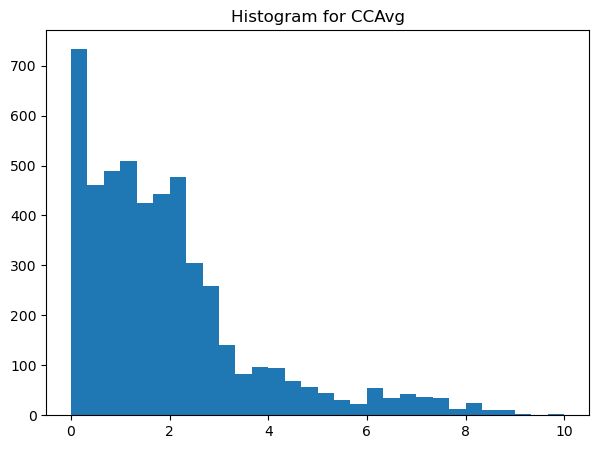

In [9]:
plt.figure(figsize=(7, 5))
plt.hist(data["CCAvg"], bins=30)
plt.title("Histogram for CCAvg")
plt.show()

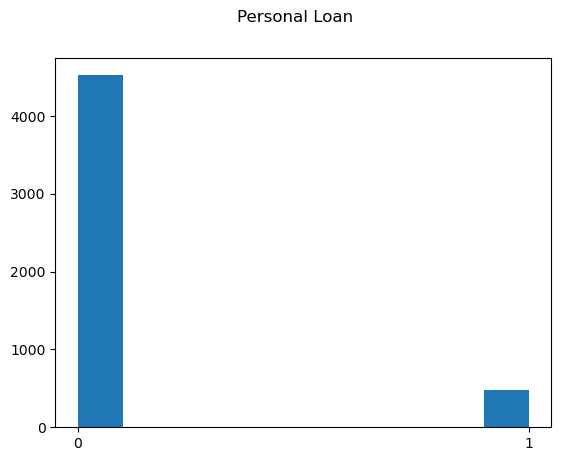

In [10]:
data["Personal Loan"].hist(bins=10)
plt.suptitle("Personal Loan")
plt.xticks([0, 1])
plt.grid(False)
plt.show()

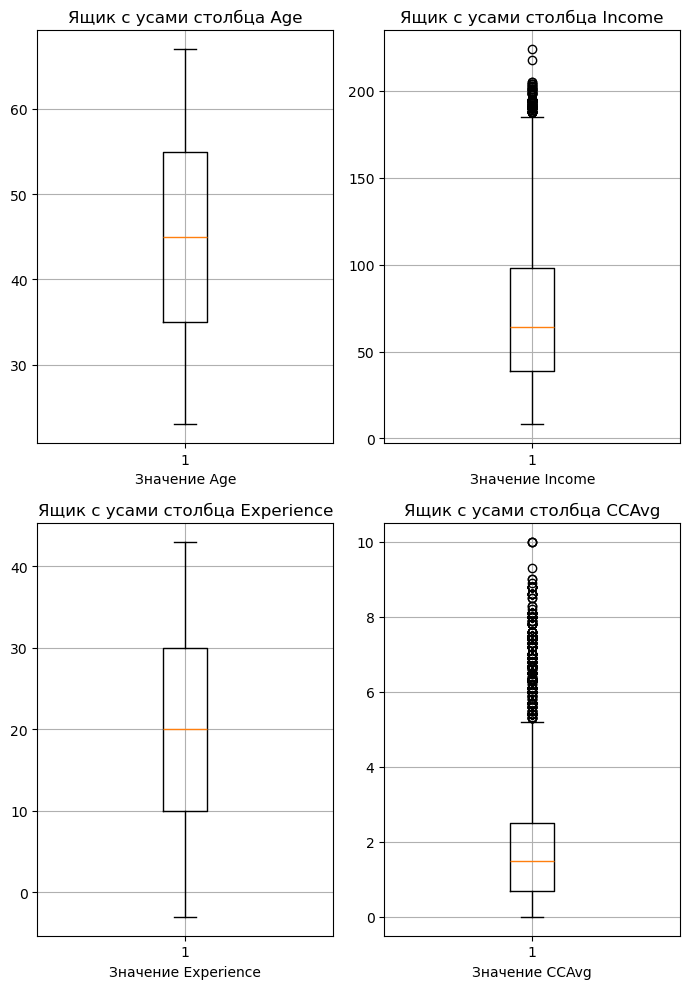

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 10))
columns = ["Age", "Income", "Experience", "CCAvg"]
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    axes[row, col].boxplot(data[column])
    axes[row, col].set_title(f"Ящик с усами столбца {column}")
    axes[row, col].set_xlabel(f"Значение {column}")
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

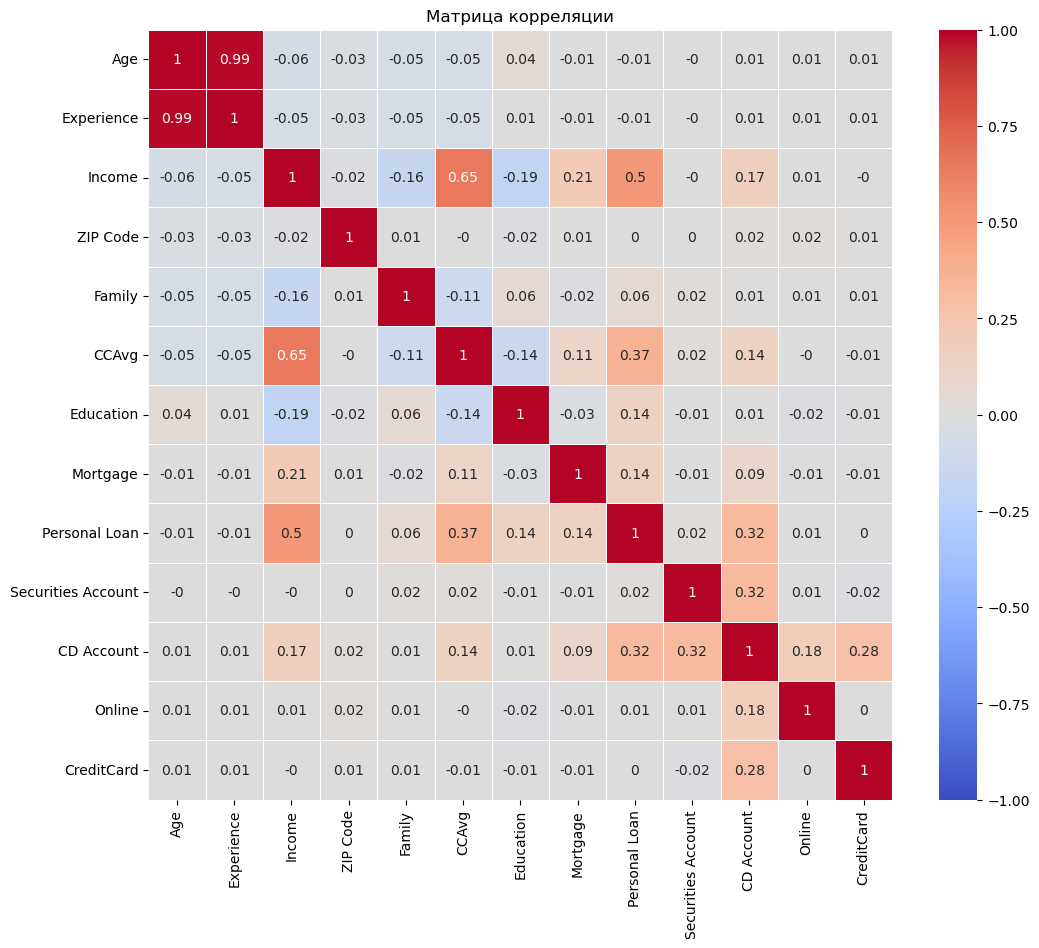

In [12]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
corr_matrix = np.round(corr_matrix, 2)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidths=0.5, cmap="coolwarm")
plt.title("Матрица корреляции")
plt.show()

In [13]:
data = data.drop("ZIP Code", axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [14]:
y = data["Personal Loan"]
X = data.drop("Personal Loan", axis=1)
y.shape

(5000,)

In [15]:
from preproccessing import data_split

X_train, y_train, X_test, y_test = data_split(X, y, size=(0.8, 0.2))

In [16]:
X_train.shape

(4000, 11)

In [17]:
from preproccessing import Normalizer

columns = [4]
normis = Normalizer("standart")
X_train_norm = normis.fit_transform(X_train, columns)
X_test_norm = normis.transform(X_test, columns)

### Binary Logistic Regression

In [18]:
from models.linear import LogisticRegression

In [20]:
from utilas import compute_class_weight

w = compute_class_weight(y_train)
w

{0: 0.5560189046427578, 1: 4.962779156327543}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

w_sk = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y_train)
w_sk

array([0.5560189 , 4.96277916])

In [22]:
model = LogisticRegression(type="binary", class_weight=w)
model.fit(X_train, y_train)

In [23]:
from sklearn.metrics import classification_report as cp

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(cp(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       923
           1       0.38      0.53      0.44        77

    accuracy                           0.90      1000
   macro avg       0.67      0.73      0.69      1000
weighted avg       0.91      0.90      0.90      1000



In [26]:
from metrics import classification_report

print(classification_report(y_test, y_pred))

                     precision         recall       f1-score        support
---------------------------------------------------------------------------
              0          0.9596         0.9263         0.9427            923
              1          0.3761         0.5325         0.4409             77
---------------------------------------------------------------------------
       accuracy                                        0.8960           1000
      macro avg          0.6679         0.7294         0.6973           1000
   weighted avg          0.9147         0.8960         0.9052           1000
None


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(class_weight=w)
model.fit(X_train, y_train)

c:\Users\AndreyVoronin\anaconda_normis\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.5560189046427578, 1: 4.962779156327543})

In [30]:
y_pred = model.predict(X_test)
print(cp(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       923
           1       0.37      0.84      0.52        77

    accuracy                           0.88      1000
   macro avg       0.68      0.86      0.72      1000
weighted avg       0.94      0.88      0.90      1000



In [31]:
print(classification_report(y_test, y_pred))

                     precision         recall       f1-score        support
---------------------------------------------------------------------------
              0          0.9855         0.8819         0.9308            923
              1          0.3736         0.8442         0.5179             77
---------------------------------------------------------------------------
       accuracy                                        0.8790           1000
      macro avg          0.6795         0.8630         0.7604           1000
   weighted avg          0.9384         0.8790         0.9077           1000
None


### Decision Tree Classifier

In [32]:
from models.tree import DecisionTreeClassifier

In [33]:
tree = DecisionTreeClassifier()
tree.fit(X_train_norm, y_train)

In [35]:
y_pred = tree.predict(X_test)
print(cp(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       891
           1       0.75      0.94      0.83       109

    accuracy                           0.96      1000
   macro avg       0.87      0.95      0.90      1000
weighted avg       0.97      0.96      0.96      1000



In [36]:
print(classification_report(y_test, y_pred))

                     precision         recall       f1-score        support
---------------------------------------------------------------------------
              0          0.9919         0.9618         0.9766            891
              1          0.7500         0.9358         0.8327            109
---------------------------------------------------------------------------
       accuracy                                        0.9590           1000
      macro avg          0.8709         0.9488         0.9082           1000
   weighted avg          0.9655         0.9590         0.9623           1000
None


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree = DecisionTreeClassifier()
tree.fit(X_train_norm, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = tree.predict(X_test)
print(cp(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       891
           1       0.89      0.89      0.89       109

    accuracy                           0.98      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.98      0.98      0.98      1000

                     precision         recall       f1-score        support
---------------------------------------------------------------------------
              0          0.9865         0.9865         0.9865            891
              1          0.8899         0.8899         0.8899            109
---------------------------------------------------------------------------
       accuracy                                        0.9760           1000
      macro avg          0.9382         0.9382         0.9382           1000
   weighted avg          0.9760         0.9760         0.9760           1000
None


### Multiclass Logistic Regression

In [40]:
from sklearn.datasets import load_iris

In [41]:
data = load_iris(as_frame=True)

In [42]:
data.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
X = data.data
y = data.target

In [44]:
from preproccessing import data_split

X_train, y_train, X_test, y_test = data_split(X, y, size=(0.8, 0.2))

In [45]:
from models.linear import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

In [46]:
y_pred = model.predict(X_test)

In [50]:
import sklearn.metrics as m

In [48]:
classification_report(y_test, y_pred)

                     precision         recall       f1-score        support
---------------------------------------------------------------------------
              0          1.0000         1.0000         1.0000             13
              1          1.0000         0.6667         0.8000              6
              2          0.8462         1.0000         0.9167             11
---------------------------------------------------------------------------
       accuracy                                        0.9333             30
      macro avg          0.9487         0.8889         0.9178             30
   weighted avg          0.9436         0.9333         0.9384             30


In [51]:
y_pred = model.predict(X_test)
print(m.classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        13
           1    1.00000   0.66667   0.80000         6
           2    0.84615   1.00000   0.91667        11

    accuracy                        0.93333        30
   macro avg    0.94872   0.88889   0.90556        30
weighted avg    0.94359   0.93333   0.92944        30



In [ ]:
from models.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [54]:
y_pred = model.predict(X_test)
print(m.classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        13
           1    1.00000   0.66667   0.80000         6
           2    0.84615   1.00000   0.91667        11

    accuracy                        0.93333        30
   macro avg    0.94872   0.88889   0.90556        30
weighted avg    0.94359   0.93333   0.92944        30



In [55]:
classification_report(y_test, y_pred)

                     precision         recall       f1-score        support
---------------------------------------------------------------------------
              0          1.0000         1.0000         1.0000             13
              1          1.0000         0.6667         0.8000              6
              2          0.8462         1.0000         0.9167             11
---------------------------------------------------------------------------
       accuracy                                        0.9333             30
      macro avg          0.9487         0.8889         0.9178             30
   weighted avg          0.9436         0.9333         0.9384             30
